In [1]:
import pandas as pd 
import numpy as np 
from pandas import datetime

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

def date_parser(x):
    return datetime.strptime(x, '%Y-%m')

sales = pd.read_csv("./shampoo-sales/sales.csv", header=[0], parse_dates=[0], date_parser=date_parser, index_col=0)

sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # Remove the CWD from sys.path while we load stuff.


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

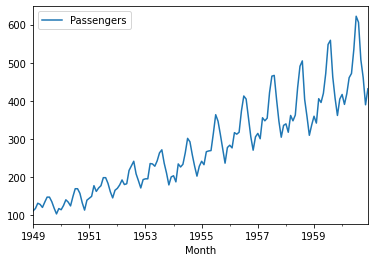

In [2]:
sales.plot()

In [18]:
train_size = int(len(sales) * .67)
test_size = len(sales) - train_size
print(train_size, test_size)
train, test = sales[:train_size], sales[train_size:]
train = np.array(train)
test = np.array(test)
print(train.shape, test.shape)

96 48
(96, 1) (48, 1)


In [20]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)

(87, 1, 8)


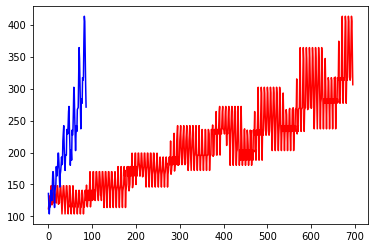

[112 118 132 129 121 135 148 148 118 132 129 121 135 148 148 136 132 129
 121 135 148 148 136 119 129 121 135 148 148 136 119 104 121 135 148 148
 136 119 104 118 135 148 148 136 119 104 118 115 148 148 136 119 104 118
 115 126 148 136 119 104 118 115 126 141 136 119 104 118 115 126 141 135
 119 104 118 115 126 141 135 125 104 118 115 126 141 135 125 149 118 115
 126 141 135 125 149 170 115 126 141 135 125 149 170 170 126 141 135 125
 149 170 170 158 141 135 125 149 170 170 158 133 135 125 149 170 170 158
 133 114 125 149 170 170 158 133 114 140 149 170 170 158 133 114 140 145
 170 170 158 133 114 140 145 150 170 158 133 114 140 145 150 178 158 133
 114 140 145 150 178 163 133 114 140 145 150 178 163 172 114 140 145 150
 178 163 172 178 140 145 150 178 163 172 178 199 145 150 178 163 172 178
 199 199 150 178 163 172 178 199 199 184 178 163 172 178 199 199 184 162
 163 172 178 199 199 184 162 146 172 178 199 199 184 162 146 166 178 199
 199 184 162 146 166 171 199 199 184 162 146 166 17

In [21]:
import matplotlib.pyplot as plt

plt.plot(trainX.flatten(),  "r")
plt.plot(trainY, "b")
plt.show()
print(trainX.flatten(), trainY)

In [34]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(1, look_back)))
model.add(
    Bidirectional(LSTM(64, activation='relu'))
)

model.add(Dense(16))
model.add(Dropout(.1))
model.add(Dense(1))
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 128)               37376     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 39,457
Trainable params: 39,457
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, epochs=100)

Epoch 1/100
87/87 [==============================] - 0s 2ms/step - loss: 7675.6230
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 2157.2085
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: 2618.9937
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 2165.7700
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 1501.0406
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: 1675.7881
Epoch 7/100
87/87 [==============================] - 0s 2ms/step - loss: 1540.4767
Epoch 8/100
87/87 [==============================] - 0s 2ms/step - loss: 1719.8840
Epoch 9/100
87/87 [==============================] - 0s 2ms/step - loss: 1541.0106
Epoch 10/100
87/87 [==============================] - 0s 2ms/step - loss: 1678.4596
Epoch 11/100
87/87 [==============================] - 0s 2ms/step - loss: 1786.8647
Epoch 12/100
87/87 [==============================] - 0s 3ms/step - loss: 936.9160
Ep

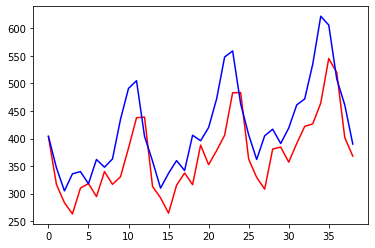

In [36]:
pred = model.predict(testX)
plt.plot(pred, "r")
plt.plot(testY, "b")
plt.show()

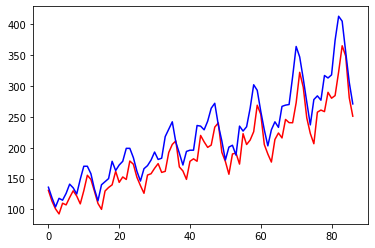

In [37]:
pred_train = model.predict(trainX)
plt.plot(pred_train, "r")
plt.plot(trainY, "b")
plt.show()